# DMS Model v2 Demo. 

Run the following cell in order to apply the necessary imports and to be able to use functions used by multiple cells.

In [3]:
""" Shared code snippets """

### Imports

from ultralytics import YOLO
import cv2
from PIL import Image
from matplotlib import pyplot as plt

###

### Constants
YOLOV8n_MODEL_PATH = 'models/yolov8n.pt'
EYES_ONLY_MODEL_PATH = 'models/eyes.pt'
DMS_V2_MODEL_PATH = 'models/dms_v2.pt'

IMAGES_PATH = 'sample_tests/images'
IMAGES_RESULTS_PATH = 'sample_tests/images/results'

VIDEOS_PATH = 'sample_tests/videos'
VIDEOS_RESULTS_PATH = 'sample_tests/videos/results'


###

### Functions

# Resize camera/video frame to have consistent dimensions for all displays
def resize_frame(frame):
    # Define the desired width and height for displaying
    desired_width = 800
    desired_height = 600

    # Get the original width and height of the image
    original_height, original_width, _ = frame.shape

    # Calculate the aspect ratio of the original image
    aspect_ratio = original_width / original_height

    # Calculate the new dimensions while preserving the aspect ratio
    if aspect_ratio > 1:
        # Landscape orientation
        new_width = desired_width
        new_height = int(new_width / aspect_ratio)
    else:
        # Portrait orientation or square
        new_height = desired_height
        new_width = int(new_height * aspect_ratio)

    # Resize the image to the new dimensions
    resized_frame = cv2.resize(frame, (new_width, new_height))

    return resized_frame


def video_feed_and_results(model, video_source):
    # Open the video file or one of the available camera devices
    cap = video_source  # Change the camera index if needed

    # Loop through the video frames
    while True:
        # Read a frame from the video
        success, frame = cap.read()

        if success:
            # Run YOLOv8 inference on the frame
            results = model(frame)

            # Visualize the results on the frame
            annotated_frame = results[0].plot()
            resized_image = resize_frame(annotated_frame)

            # Display the annotated frame
            cv2.imshow("DMS Model V2 Inference", resized_image)

            # Break the loop if 'q' is pressed
            if cv2.waitKey(1) & 0xFF == ord("q"):
                break
        else:
            # Break the loop if the end of the video is reached
            break

    # Release the video capture object and close the display window
    cap.release()
    cv2.destroyAllWindows()

###

### First, let's try the original yolov8n model, which can detect 80 different classes. 

In [4]:
# Import the pretrained YOLOv8n model
model = YOLO(YOLOV8n_MODEL_PATH)

# Display model information
model.info()

# Get the list of object names (objects that the model is able to detect)
object_names = model.names

# Print the list of object names
print(object_names)

# Open the video file or one of the available camera devices
cap = cv2.VideoCapture(1)  # Change the camera index if needed or specify video path

video_feed_and_results(model=model, video_source=cap)

YOLOv8n summary: 225 layers, 3157200 parameters, 0 gradients


{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microw


0: 480x640 1 person, 1 potted plant, 45.7ms
Speed: 2.0ms preprocess, 45.7ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 potted plant, 10.3ms
Speed: 1.0ms preprocess, 10.3ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 potted plant, 16.3ms
Speed: 3.6ms preprocess, 16.3ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 potted plant, 10.3ms
Speed: 1.0ms preprocess, 10.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 potted plant, 8.5ms
Speed: 2.0ms preprocess, 8.5ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 potted plant, 8.6ms
Speed: 1.0ms preprocess, 8.6ms inference, 2.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 potted plant, 9.1ms
Speed: 1.0ms preprocess, 9.1ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 

## Second, let's test the custom YOLOv8 model (dms-model-v2).
#### The model can detect the following classes:
- Open Eye
- Closed Eye
- Cigarette
- Phone
- Seatbelt

In [5]:
# Load Custom YOLOv8 Model
model = YOLO(DMS_V2_MODEL_PATH)

# Display model information
model.info()

# Get the list of object names (objects that the model is able to detect)
object_names = model.names

# Print the list of object names
print(object_names)

# Open the video file or one of the available camera devices
cap = cv2.VideoCapture(1)  # Change the camera index if needed 

### Or specify a video path
# video_file_name = 'v4.mp4'
# cap = cv2.VideoCapture(f'{VIDEOS_PATH}/{video_file_name}')  # Change the camera index if needed or specify video path
###

video_feed_and_results(model=model, video_source=cap)

Model summary: 225 layers, 3011823 parameters, 0 gradients


{0: 'Open Eye', 1: 'Closed Eye', 2: 'Cigarette', 3: 'Phone', 4: 'Seatbelt'}



0: 480x640 1 Open Eye, 1 Closed Eye, 17.9ms
Speed: 2.0ms preprocess, 17.9ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 Open Eyes, 17.2ms
Speed: 3.5ms preprocess, 17.2ms inference, 4.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Open Eye, 1 Closed Eye, 17.1ms
Speed: 2.2ms preprocess, 17.1ms inference, 6.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Open Eye, 1 Closed Eye, 9.0ms
Speed: 2.5ms preprocess, 9.0ms inference, 3.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Open Eye, 1 Closed Eye, 8.2ms
Speed: 1.0ms preprocess, 8.2ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Open Eye, 1 Closed Eye, 11.3ms
Speed: 1.0ms preprocess, 11.3ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Open Eye, 1 Closed Eye, 10.5ms
Speed: 1.0ms preprocess, 10.5ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Open Eye,

To save video results:
(results will be saved at ./runs/detect/predict#/filename)

In [10]:
# Load Custom YOLOv8 Model
model = YOLO(DMS_V2_MODEL_PATH)
model.predict(source=f'{VIDEOS_PATH}/v4.mp4', save=True, conf=0.4, show=True)



WARNING  inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (1/742) C:\Users\habba\PycharmProjects\DMS\sample_tests\videos\v4.mp4: 384x640 2 Open Eyes, 1 Seatbelt, 15.9ms
video 1/1 (2/742) C:\Users\habba\PycharmProjects\DMS\sample_tests\videos\v4.mp4: 384x640 2 Open Eyes, 1 Seatbelt, 16.8ms
video 1/1 (3/742) C:\Users\habba\PycharmProjects\DMS\sample_tests\videos\v4.mp4: 384x640 2 Open Eyes, 1 Seatbelt, 14.5ms
video 1/1 (4/742) C:\Users\habba\PycharmProjects\DMS\sample_tests\videos\v4.mp4: 384x640 2 Open

KeyboardInterrupt: 

It's also possible to use a YOLO command to run inference on a video or camera input and save the results to a file.

In [ ]:
!yolo predict model=models/dms_v2.pt source=1 show=True

## Third, testing the model on images and showing the results.


0: 384x640 2 Open Eyes, 1 Seatbelt, 30.5ms
Speed: 2.5ms preprocess, 30.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


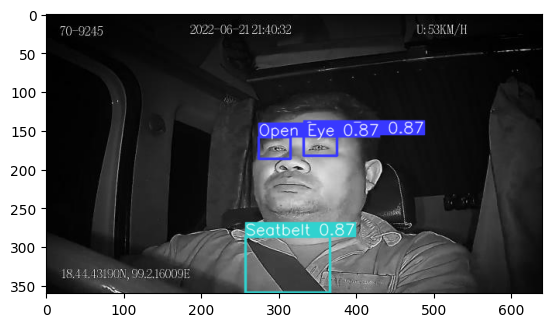

tensor([[257.6143, 287.0253, 366.4730, 359.9640,   0.8658,   4.0000],
        [274.8839, 159.2892, 315.8405, 187.0555,   0.8657,   0.0000],
        [332.0088, 156.2071, 375.5983, 183.6939,   0.8657,   0.0000]], device='cuda:0')


In [14]:
# Load Custom YOLOv8 Model
model = YOLO(DMS_V2_MODEL_PATH)

img_file_name = '2.jpg'

# Load the input image
img = cv2.imread(f'{IMAGES_PATH}/{img_file_name}')

# Run inference on an image
results = model(img)  # results list

# Visualize the results on the frame
annotated_frame = results[0].plot()

#Show the image with matplotlib
plt.imshow(annotated_frame)
plt.show()

# View results
for r in results:
    print(r.boxes.data)  # print the Boxes object containing the detection bounding boxes

# Show the results
for r in results:
    im_array = r.plot()  # plot a BGR numpy array of predictions
    im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
    im.show()  # show image
    im.save(f'{IMAGES_RESULTS_PATH}/results - {img_file_name}')  # save image